In [1]:
using Distributed, PyPlot

In [2]:
addprocs(4);

In [15]:
@everywhere using DistributedArrays, DistributedJets, Jets, JetPack, JetPackWave, Statistics, Random, Wave

In [4]:
v = read!("../marmousi_20m_nz151_nx461.bin", Array{Float32}(undef, 151,461));
dz,dx = 0.02,0.02
nz,nx = size(v)
@show dz,dx
@show nz,nx;

(dz, dx) = (0.02, 0.02)
(nz, nx) = (151, 461)


In [5]:
sx = (0.0:dx*50:(461-1)*0.02)
nshots = length(sx)
@show nshots;

nshots = 10


In [6]:
@everywhere function makeF(i,sx)
    nz,nx,dz,dx = 151,461,0.02,0.02    
    JopNlProp2DAcoIsoDenQ_DEO2_FDTD(;
        b = ones(Float32,nz,nx),
        isinterior = true,
        ntrec = 1101,
        dtrec = 0.002,
        dtmod = 0.001,
        dz = dz,
        dx = dx,
        wavelet = WaveletCausalRicker(f=5.0),
        sx = sx[i],
        sz = dz,
        rx = dx*[0:0.5:nx-1;],
        rz = 2*dz*ones(length(0:0.5:nx-1)),
        srcfieldfile = "/local/tmp/field-$(i)-$(randstring()).bin",
        reportinterval=1000)
end

In [7]:
F = @blockop DArray(I->[makeF(i,sx) for i in I[1], j in I[2]], (nshots,1))

"Jet nonlinear operator, (151, 461) → (10140210,)"

In [8]:
d = F*v

[ Info: nonlinear forward on sal-gate0352.gcn0.chevron.net, srcfieldfile=/local/tmp/field-7-q9ziJY6t.bin
[ Info: Prop2DAcoIsoDenQ_DEO2_FDTD, nonlinear forward, time step     1 of  2201 ;    0.00 MCells/s (IO= 0.00%, EX= 0.00%) -- rms d,p; 0.0000e+00 0.0000e+00
[ Info: nonlinear forward on sal-gate0352.gcn0.chevron.net, srcfieldfile=/local/tmp/field-4-kXiq7w2G.bin
[ Info: Prop2DAcoIsoDenQ_DEO2_FDTD, nonlinear forward, time step     1 of  2201 ;    0.00 MCells/s (IO= 0.00%, EX= 0.00%) -- rms d,p; 0.0000e+00 0.0000e+00
[ Info: nonlinear forward on sal-gate0352.gcn0.chevron.net, srcfieldfile=/local/tmp/field-1-GydKdeG0.bin
[ Info: Prop2DAcoIsoDenQ_DEO2_FDTD, nonlinear forward, time step     1 of  2201 ;    0.00 MCells/s (IO= 0.00%, EX= 0.00%) -- rms d,p; 0.0000e+00 0.0000e+00
[ Info: nonlinear forward on sal-gate0352.gcn0.chevron.net, srcfieldfile=/local/tmp/field-9-tRrznDEr.bin
[ Info: Prop2DAcoIsoDenQ_DEO2_FDTD, nonlinear forward, time step     1 of  2201 ;    0.00 MCells/s (IO= 0.00%, E

10140210-element DBArray{Float32,Jets.BlockArray{Float32,Array{Float32,2}},Array{Jets.BlockArray{Float32,Array{Float32,2}},1}}:
  0.0
 -2.2683199f-12
 -3.440062f-11
 -1.597973f-10
 -4.701813f-10
 -1.0720419f-9
 -2.0704634f-9
 -3.5544416f-9
 -5.5874363f-9
 -8.205653f-9
 -1.14247385f-8
 -1.5253601f-8
 -1.9712546f-8
  ⋮
  2.4294306f-7
  2.3813033f-7
  2.3332255f-7
  2.2848533f-7
  2.2357636f-7
  2.1854684f-7
  2.1334289f-7
  2.0790712f-7
  2.0218027f-7
  1.9610283f-7
  1.896167f-7
  1.8266682f-7

In [9]:
J = jacobian!(F, v)
ill = srcillum(J)
mig = J'*d

[ Info: linear adjoint on sal-gate0352.gcn0.chevron.net, srcfieldfile=/local/tmp/field-7-q9ziJY6t.bin
[ Info: PropLn2DAcoIsoDenQ_DEO2_FDTD, adjoint, time step     1 of  2201 ;    0.00 MCells/s (IO= 0.00%, EX= 0.00%, IM= 0.00%) -- rms d,p; 1.5016e-06 0.0000e+00
[ Info: linear adjoint on sal-gate0352.gcn0.chevron.net, srcfieldfile=/local/tmp/field-9-tRrznDEr.bin
[ Info: PropLn2DAcoIsoDenQ_DEO2_FDTD, adjoint, time step     1 of  2201 ;    0.00 MCells/s (IO= 0.00%, EX= 0.00%, IM= 0.00%) -- rms d,p; 1.5390e-06 0.0000e+00
[ Info: linear adjoint on sal-gate0352.gcn0.chevron.net, srcfieldfile=/local/tmp/field-4-kXiq7w2G.bin
[ Info: PropLn2DAcoIsoDenQ_DEO2_FDTD, adjoint, time step     1 of  2201 ;    0.00 MCells/s (IO= 0.00%, EX= 0.00%, IM= 0.00%) -- rms d,p; 1.5227e-06 0.0000e+00
[ Info: PropLn2DAcoIsoDenQ_DEO2_FDTD, adjoint, time step   202 of  2201 ;   59.97 MCells/s (IO= 8.81%, EX=13.31%, IM=17.58%) -- rms d,p; 1.5016e-06 2.0619e-10
[ Info: PropLn2DAcoIsoDenQ_DEO2_FDTD, adjoint, time step  

151×461 Array{Float32,2}:
 -3.68918f-8   -4.60331f-8   -2.88108f-8   …   3.70439f-9    5.03372f-9
 -1.9888f-7    -1.26478f-7   -6.99076f-8      -1.9959f-9     2.20804f-9
 -1.07967f-7   -1.15186f-7   -7.97445f-8      -3.33043f-9   -8.85124f-10
 -6.50286f-9   -2.47714f-8   -2.4051f-8       -2.31883f-9   -3.87763f-10
  2.53548f-8    1.18764f-8    3.64622f-9      -1.21504f-9    7.18606f-11
  3.17409f-8    2.46431f-8    1.64291f-8   …  -4.10981f-10   3.47141f-10
  2.53295f-8    2.32435f-8    1.82601f-8      -5.28725f-11   4.42955f-10
  1.32776f-8    1.39756f-8    1.25481f-8       4.4123f-11    2.89404f-10
  6.9492f-9     8.66686f-9    9.01357f-9      -7.60722f-11   5.35881f-11
  2.9415f-9     4.79054f-9    5.93594f-9      -2.63163f-10  -1.71105f-10
  6.41186f-10   2.17297f-9    3.46188f-9   …  -4.28659f-10  -3.72721f-10
 -6.965f-10     5.5445f-10    1.84414f-9      -5.6143f-10   -8.52077f-10
 -1.25679f-9   -5.6459f-10    3.16371f-10     -9.90376f-10  -7.7509f-10
  ⋮                         

## Low cut filter

In [12]:
L = JopHighpass(JetSpace(Float32,nz,nx))

"Jet linear operator, (151, 461) → (151, 461)"

## Apply low cut filter and illumination compenstation

In [38]:
img = (L*mig) ./ (ill .+ 1e-9*mean(ill));

## Gain

In [43]:
g = ([0:(nz-1);]*dz).^2 * ones(1,nx);

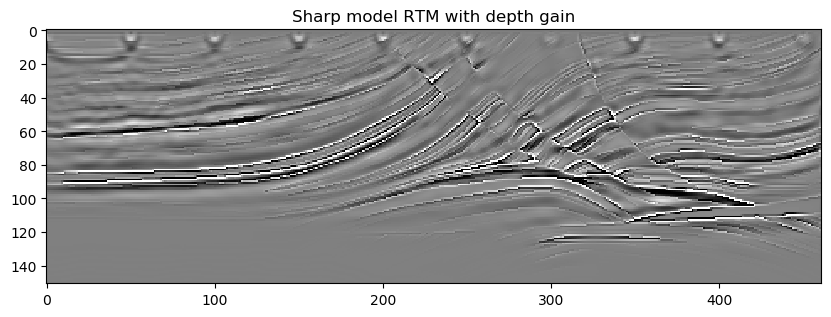

In [54]:
figure(figsize=(10,5))
imshow(g.*img,cmap="gray");clim(-1e-3,1e-3);title("Sharp model RTM with depth gain");

## Remove local files

In [55]:
close(F)

## Remove workers

In [56]:
rmprocs(workers())

Task (done) @0x00002b3bfbe20eb0